<h2 align="center">Hospitality Domain Data Analysis Project<h2>

In [62]:
#importing pandas library
import pandas as pd
import matplotlib.pyplot as plt

In [63]:
string = "CodeBasics"
print(string[-4:])

sics


### 1. Data Exploration ==>

#### Datasets:
- dim_date.csv
- dim_hotels.csv
- dim_rooms.csv
- fact_aggregated_bookings.csv
- fact_bookings.csv

####  Reading fact_bookings data 

In [64]:
df_bookings = pd.read_csv(r"D:\yash\Code Basics\4.Python\source-code\3_project_hospitality_analysis\datasets\fact_bookings.csv")

In [65]:
# displaying first 5 rows 
df_bookings.head()

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
0,May012216558RT11,16558,27-04-22,1/5/2022,2/5/2022,-3.0,RT1,direct online,1.0,Checked Out,10010,10010
1,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
2,May012216558RT13,16558,28-04-22,1/5/2022,4/5/2022,2.0,RT1,logtrip,5.0,Checked Out,9100000,9100
3,May012216558RT14,16558,28-04-22,1/5/2022,2/5/2022,-2.0,RT1,others,NaN,Cancelled,9100,3640
4,May012216558RT15,16558,27-04-22,1/5/2022,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920


In [66]:
df_bookings.shape #data set contain 134590 rows and 12 columns 

(134590, 12)

In [67]:
df_bookings.room_category.unique() 

array(['RT1', 'RT2', 'RT3', 'RT4'], dtype=object)

In [68]:
df_bookings.booking_platform.unique()

array(['direct online', 'others', 'logtrip', 'tripster', 'makeyourtrip',
       'journey', 'direct offline'], dtype=object)

In [69]:
df_bookings.booking_platform.value_counts()

others            55066
makeyourtrip      26898
logtrip           14756
direct online     13379
tripster           9630
journey            8106
direct offline     6755
Name: booking_platform, dtype: int64

In [70]:
sum = 0
for i in df_bookings.booking_platform.value_counts().to_list():
    sum = sum + i
print(sum) # there is no missing values for booking platform as it matches number of rows in shape function 

134590


<AxesSubplot:>

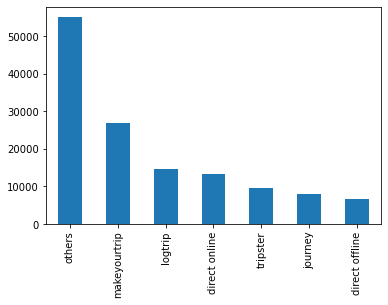

In [71]:
df_bookings.booking_platform.value_counts().plot(kind = "bar")

In [72]:
df_bookings.describe()

,property_id,no_guests,ratings_given,revenue_generated,revenue_realized
count,134590.000000,134587.000000,56683.000000,1.345900e+05,134590.000000
mean,18061.113493,2.036170,3.619004,1.537805e+04,12696.123256
std,1093.055847,1.034885,1.235009,9.303604e+04,6928.108124
min,16558.000000,-17.000000,1.000000,6.500000e+03,2600.000000
25%,17558.000000,1.000000,3.000000,9.900000e+03,7600.000000
50%,17564.000000,2.000000,4.000000,1.350000e+04,11700.000000
75%,18563.000000,2.000000,5.000000,1.800000e+04,15300.000000
max,19563.000000,6.000000,5.000000,2.856000e+07,45220.000000


In [73]:
# Readings other data sets
df_date = pd.read_csv(r"D:\yash\Code Basics\4.Python\source-code\3_project_hospitality_analysis\datasets\dim_date.csv")
df_hotels = pd.read_csv(r"D:\yash\Code Basics\4.Python\source-code\3_project_hospitality_analysis\datasets\dim_hotels.csv")
df_rooms = pd.read_csv(r"D:\yash\Code Basics\4.Python\source-code\3_project_hospitality_analysis\datasets\dim_rooms.csv")
df_aggregated_bookings = pd.read_csv(r"D:\yash\Code Basics\4.Python\source-code\3_project_hospitality_analysis\datasets\fact_aggregated_bookings.csv")

#### Reading dim_hotels data 

In [74]:
 
df_hotels.shape

(25, 4)

In [75]:
df_hotels.head(3)

,property_id,property_name,category,city
0,16558,Atliq Grands,Luxury,Delhi
1,16559,Atliq Exotica,Luxury,Mumbai
2,16560,Atliq City,Business,Delhi


In [76]:
df_hotels.category.value_counts()

Luxury      16
Business     9
Name: category, dtype: int64

In [77]:
sum= 0
for i in df_hotels.category.value_counts().to_list():
    sum += i
print(sum)   #no missing values found

25


<AxesSubplot:>

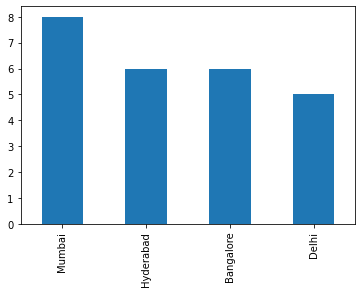

In [78]:
df_hotels.city.value_counts().plot(kind = "bar")

#### Reading fact_aggregated_bookings data

In [79]:
df_aggregated_bookings.head()

,property_id,check_in_date,room_category,successful_bookings,capacity
0,16559,1-May-22,RT1,25,30.0
1,19562,1-May-22,RT1,28,30.0
2,19563,1-May-22,RT1,23,30.0
3,17558,1-May-22,RT1,30,19.0
4,16558,1-May-22,RT1,18,19.0


In [80]:
df_aggregated_bookings.property_id.unique()

array([16559, 19562, 19563, 17558, 16558, 17560, 19558, 19560, 17561,
       16560, 16561, 16562, 16563, 17559, 17562, 17563, 18558, 18559,
       18561, 18562, 18563, 19559, 19561, 17564, 18560], dtype=int64)

In [81]:
#total bookings per property id
df_aggregated_bookings.groupby(by=["property_id"]).sum()[["successful_bookings"]]

,successful_bookings
property_id,
16558,3153
16559,7338
16560,4693
16561,4418
16562,4820
16563,7211
17558,5053
17559,6142
17560,6013


In [82]:
#days on which bookings are greater than capacity
df_aggregated_bookings[["check_in_date","successful_bookings","capacity"]][df_aggregated_bookings["successful_bookings"] > df_aggregated_bookings["capacity"]]

,check_in_date,successful_bookings,capacity
3,1-May-22,30,19.0
12,1-May-22,100,41.0
4136,11-Jun-22,50,39.0
6209,2-Jul-22,123,26.0
8522,25-Jul-22,35,24.0
9194,31-Jul-22,20,18.0


In [83]:
#properties that have highest capacity
df_aggregated_bookings["property_id"][df_aggregated_bookings["capacity"] == df_aggregated_bookings["capacity"].max()].unique()

array([17558], dtype=int64)

### 2. Data Cleaning ==>

#### cleaning bookings dataset

In [84]:
df_bookings.describe() # no_guest cannot be negative 

,property_id,no_guests,ratings_given,revenue_generated,revenue_realized
count,134590.000000,134587.000000,56683.000000,1.345900e+05,134590.000000
mean,18061.113493,2.036170,3.619004,1.537805e+04,12696.123256
std,1093.055847,1.034885,1.235009,9.303604e+04,6928.108124
min,16558.000000,-17.000000,1.000000,6.500000e+03,2600.000000
25%,17558.000000,1.000000,3.000000,9.900000e+03,7600.000000
50%,17564.000000,2.000000,4.000000,1.350000e+04,11700.000000
75%,18563.000000,2.000000,5.000000,1.800000e+04,15300.000000
max,19563.000000,6.000000,5.000000,2.856000e+07,45220.000000


In [85]:
df_bookings.shape

(134590, 12)

#### i. cleaning no_guests 

In [86]:
df_bookings[df_bookings["no_guests"] < 0 ] 

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
0,May012216558RT11,16558,27-04-22,1/5/2022,2/5/2022,-3.0,RT1,direct online,1.0,Checked Out,10010,10010
3,May012216558RT14,16558,28-04-22,1/5/2022,2/5/2022,-2.0,RT1,others,NaN,Cancelled,9100,3640
17924,May122218559RT44,18559,12/5/2022,12/5/2022,14-05-22,-10.0,RT4,direct online,NaN,No Show,20900,20900
18020,May122218561RT22,18561,8/5/2022,12/5/2022,14-05-22,-12.0,RT2,makeyourtrip,NaN,Cancelled,9000,3600
18119,May122218562RT311,18562,5/5/2022,12/5/2022,17-05-22,-6.0,RT3,direct offline,5.0,Checked Out,16800,16800
18121,May122218562RT313,18562,10/5/2022,12/5/2022,17-05-22,-4.0,RT3,direct online,NaN,Cancelled,14400,5760
56715,Jun082218562RT12,18562,5/6/2022,8/6/2022,13-06-22,-17.0,RT1,others,NaN,Checked Out,6500,6500
119765,Jul202219560RT220,19560,19-07-22,20-07-22,22-07-22,-1.0,RT2,others,NaN,Checked Out,13500,13500
134586,Jul312217564RT47,17564,30-07-22,31-07-22,1/8/2022,-4.0,RT4,logtrip,2.0,Checked Out,38760,38760


As compared to the total rows ie 134590 , the rows of the above result is very less so we can ignore them

In [87]:
# considering data with no_guests > 0
df_bookings = df_bookings[df_bookings["no_guests"] > 0 ] 

In [88]:
df_bookings.head()

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
1,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
2,May012216558RT13,16558,28-04-22,1/5/2022,4/5/2022,2.0,RT1,logtrip,5.0,Checked Out,9100000,9100
4,May012216558RT15,16558,27-04-22,1/5/2022,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920
5,May012216558RT16,16558,1/5/2022,1/5/2022,3/5/2022,2.0,RT1,others,4.0,Checked Out,9100,9100
6,May012216558RT17,16558,28-04-22,1/5/2022,6/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640


In [89]:
df_bookings.shape

(134578, 12)

#### ii.Cleaning revenue_generated column

In [90]:
# revenue generated is per day
df_bookings["revenue_generated"].max() #this value is fairly large 

28560000

In [91]:
df_bookings["revenue_generated"].min() # we are safe on lower limit side

6500

In [92]:
# lets check the outlier 
higher_limit = df_bookings["revenue_generated"].mean() + (3*df_bookings["revenue_generated"].std())
higher_limit

294498.50173198653

In [93]:
df_bookings[df_bookings["revenue_generated"] > higher_limit]

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
2,May012216558RT13,16558,28-04-22,1/5/2022,4/5/2022,2.0,RT1,logtrip,5.0,Checked Out,9100000,9100
111,May012216559RT32,16559,29-04-22,1/5/2022,2/5/2022,6.0,RT3,direct online,NaN,Checked Out,28560000,28560
315,May012216562RT22,16562,28-04-22,1/5/2022,4/5/2022,2.0,RT2,direct offline,3.0,Checked Out,12600000,12600
562,May012217559RT118,17559,26-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,2000000,4420
129176,Jul282216562RT26,16562,21-07-22,28-07-22,29-07-22,2.0,RT2,direct online,3.0,Checked Out,10000000,12600


removing outliers and saving the dataframe

In [94]:
df_bookings = df_bookings[df_bookings["revenue_generated"] < higher_limit]

In [95]:
df_bookings.shape

(134573, 12)

#### iii. cleaning revenue realized column

In [96]:
df_bookings.revenue_realized.describe() 

count    134573.000000
mean      12695.983585
std        6927.791692
min        2600.000000
25%        7600.000000
50%       11700.000000
75%       15300.000000
max       45220.000000
Name: revenue_realized, dtype: float64

In [97]:
higher_limit = df_bookings.revenue_realized.mean() + (3* df_bookings.revenue_realized.std())
higher_limit

33479.3586618449

Max is 45220 lets deep down for maximum value

In [98]:
df_bookings[df_bookings["revenue_realized"] == df_bookings["revenue_realized"].max()]

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
139,May012216559RT43,16559,1/5/2022,1/5/2022,2/5/2022,6.0,RT4,tripster,3.0,Checked Out,45220,45220
715,May012217560RT46,17560,28-04-22,1/5/2022,2/5/2022,6.0,RT4,makeyourtrip,3.0,Checked Out,45220,45220
719,May012217560RT410,17560,1/5/2022,1/5/2022,4/5/2022,6.0,RT4,others,2.0,Checked Out,45220,45220
2107,May022216559RT47,16559,28-04-22,2/5/2022,4/5/2022,6.0,RT4,logtrip,NaN,Checked Out,45220,45220
2381,May022217558RT42,17558,25-04-22,2/5/2022,8/5/2022,6.0,RT4,makeyourtrip,3.0,Checked Out,45220,45220
...,...,...,...,...,...,...,...,...,...,...,...,...
132069,Jul302217563RT414,17563,30-07-22,30-07-22,3/8/2022,6.0,RT4,logtrip,NaN,Checked Out,45220,45220
133389,Jul312217558RT42,17558,28-07-22,31-07-22,1/8/2022,6.0,RT4,makeyourtrip,2.0,Checked Out,45220,45220
133453,Jul312217559RT45,17559,26-07-22,31-07-22,6/8/2022,6.0,RT4,makeyourtrip,5.0,Checked Out,45220,45220
133456,Jul312217559RT48,17559,29-07-22,31-07-22,2/8/2022,6.0,RT4,makeyourtrip,4.0,Checked Out,45220,45220


Room_category is RT4 lets check what RT4 represents 

In [99]:
df_rooms

,room_id,room_class
0,RT1,Standard
1,RT2,Elite
2,RT3,Premium
3,RT4,Presidential


RT4 is Presidential which is the most expensive suite among all 

In [100]:
df_bookings["revenue_realized"][df_bookings["room_category"] == "RT4"].describe()

count    16071.000000
mean     23439.308444
std       9048.599076
min       7600.000000
25%      19000.000000
50%      26600.000000
75%      32300.000000
max      45220.000000
Name: revenue_realized, dtype: float64

In [101]:
23439.308444 + 3*9048.599076 

50585.105672000005

As our maximum is less then higher limit so we dont have to clean this data

In [102]:
df_bookings.isnull().sum()

booking_id               0
property_id              0
booking_date             0
check_in_date            0
checkout_date            0
no_guests                0
room_category            0
booking_platform         0
ratings_given        77897
booking_status           0
revenue_generated        0
revenue_realized         0
dtype: int64

As many of population does not give ratings, so we dont have to replace the missing data. 

#### Cleaning aggregate_bookings dataset

In [103]:
 #In aggregate bookings find columns that have null values. Fill these null values with whatever you think
 #is the appropriate subtitute (possible ways is to use mean or median)
df_aggregated_bookings.isnull().sum()

property_id            0
check_in_date          0
room_category          0
successful_bookings    0
capacity               2
dtype: int64

In [104]:
#or
df_aggregated_bookings.isna().sum()

property_id            0
check_in_date          0
room_category          0
successful_bookings    0
capacity               2
dtype: int64

In [105]:
df_aggregated_bookings[df_aggregated_bookings["capacity"].isna()] # replace null values with zero to see the related data 

,property_id,check_in_date,room_category,successful_bookings,capacity
8,17561,1-May-22,RT1,22,NaN
14,17562,1-May-22,RT1,12,NaN


we can see for Rt1 room_cateogory we have Null capacity   

In [106]:
df_aggregated_bookings[df_aggregated_bookings["room_category"] == "RT1"]["capacity"].describe()

count    2298.000000
mean       28.885117
std         7.934090
min        15.000000
25%        24.000000
50%        30.000000
75%        34.000000
max        42.000000
Name: capacity, dtype: float64

<AxesSubplot:ylabel='Frequency'>

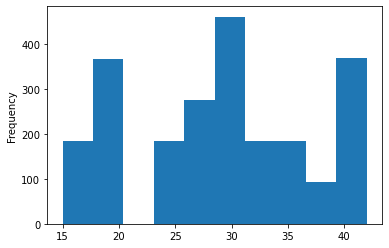

In [107]:
df_aggregated_bookings[df_aggregated_bookings["room_category"] == "RT1"]["capacity"].plot(kind = "hist")

replacing by median as distribution is skewed

In [108]:
df_aggregated_bookings["capacity"] = df_aggregated_bookings["capacity"].fillna(df_aggregated_bookings[df_aggregated_bookings["room_category"] == "RT1"]["capacity"]) 

lets check property_id 17561 and 17562 which was null before

In [109]:
df_aggregated_bookings.loc[[8,14]] 

,property_id,check_in_date,room_category,successful_bookings,capacity
8,17561,1-May-22,RT1,22,NaN
14,17562,1-May-22,RT1,12,NaN


values are replaced succesfully

In [110]:
#records that have successful_bookings value greater than capacity.
df_aggregated_bookings[df_aggregated_bookings["successful_bookings"] > df_aggregated_bookings["capacity"]]

,property_id,check_in_date,room_category,successful_bookings,capacity
3,17558,1-May-22,RT1,30,19.0
12,16563,1-May-22,RT1,100,41.0
4136,19558,11-Jun-22,RT2,50,39.0
6209,19560,2-Jul-22,RT1,123,26.0
8522,19559,25-Jul-22,RT1,35,24.0
9194,18563,31-Jul-22,RT4,20,18.0


we can see for RT1 we have most cases of over booking, Atliq needs to put more focus on RT1 rooms

### 3. Data Transformation==>

In [111]:
# Creating occupancy perc column
df_aggregated_bookings.head()

,property_id,check_in_date,room_category,successful_bookings,capacity
0,16559,1-May-22,RT1,25,30.0
1,19562,1-May-22,RT1,28,30.0
2,19563,1-May-22,RT1,23,30.0
3,17558,1-May-22,RT1,30,19.0
4,16558,1-May-22,RT1,18,19.0


In [112]:
df_aggregated_bookings["Occupancy_perc"] = df_aggregated_bookings["successful_bookings"]/df_aggregated_bookings["capacity"]

In [113]:
df_aggregated_bookings.head()

,property_id,check_in_date,room_category,successful_bookings,capacity,Occupancy_perc
0,16559,1-May-22,RT1,25,30.0,0.833333
1,19562,1-May-22,RT1,28,30.0,0.933333
2,19563,1-May-22,RT1,23,30.0,0.766667
3,17558,1-May-22,RT1,30,19.0,1.578947
4,16558,1-May-22,RT1,18,19.0,0.947368


In [114]:
#converting into percentage
df_aggregated_bookings["Occupancy_perc"] = df_aggregated_bookings["Occupancy_perc"].apply(lambda x : round(x*100,2))  

In [115]:
df_aggregated_bookings.head()

,property_id,check_in_date,room_category,successful_bookings,capacity,Occupancy_perc
0,16559,1-May-22,RT1,25,30.0,83.33
1,19562,1-May-22,RT1,28,30.0,93.33
2,19563,1-May-22,RT1,23,30.0,76.67
3,17558,1-May-22,RT1,30,19.0,157.89
4,16558,1-May-22,RT1,18,19.0,94.74


### 4. Insights Generation ==>

**1. What is an average occupancy rate in each of the room categories?**

In [116]:
df_aggregated_bookings.head(2)

,property_id,check_in_date,room_category,successful_bookings,capacity,Occupancy_perc
0,16559,1-May-22,RT1,25,30.0,83.33
1,19562,1-May-22,RT1,28,30.0,93.33


In [117]:
df_rooms

,room_id,room_class
0,RT1,Standard
1,RT2,Elite
2,RT3,Premium
3,RT4,Presidential


In [118]:
df_final = pd.merge(df_aggregated_bookings,df_rooms, left_on="room_category",right_on="room_id")
df_final.tail(3)

,property_id,check_in_date,room_category,successful_bookings,capacity,Occupancy_perc,room_id,room_class
9197,17558,31-Jul-22,RT4,3,6.0,50.0,RT4,Presidential
9198,19563,31-Jul-22,RT4,3,6.0,50.0,RT4,Presidential
9199,17561,31-Jul-22,RT4,3,4.0,75.0,RT4,Presidential


In [119]:
df_final.drop("room_id", axis= 1, inplace=True)
df_final.head(3)

,property_id,check_in_date,room_category,successful_bookings,capacity,Occupancy_perc,room_class
0,16559,1-May-22,RT1,25,30.0,83.33,Standard
1,19562,1-May-22,RT1,28,30.0,93.33,Standard
2,19563,1-May-22,RT1,23,30.0,76.67,Standard


In [120]:
df1 = round(df_final.groupby(by=["room_class"]).mean()[["Occupancy_perc"]],2)
df1.columns = ["Avg_occupancy_perc"]
df1

,Avg_occupancy_perc
room_class,
Elite,58.04
Premium,58.03
Presidential,59.30
Standard,58.22


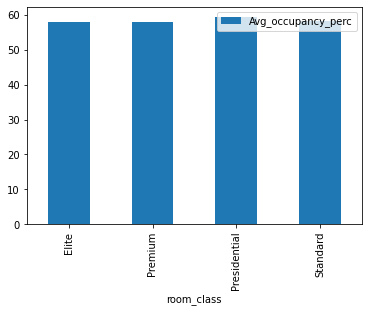

In [121]:
df1.plot(kind = "bar")
plt.show()

Every room class have almost same average Occupancy_perc

**2. Print average occupancy rate per city**

In [122]:
df_hotels.head(3)

,property_id,property_name,category,city
0,16558,Atliq Grands,Luxury,Delhi
1,16559,Atliq Exotica,Luxury,Mumbai
2,16560,Atliq City,Business,Delhi


In [123]:
df_final = pd.merge(df_final,df_hotels,on="property_id")
df_final.head(3)

,property_id,check_in_date,room_category,successful_bookings,capacity,Occupancy_perc,room_class,property_name,category,city
0,16559,1-May-22,RT1,25,30.0,83.33,Standard,Atliq Exotica,Luxury,Mumbai
1,16559,2-May-22,RT1,20,30.0,66.67,Standard,Atliq Exotica,Luxury,Mumbai
2,16559,3-May-22,RT1,17,30.0,56.67,Standard,Atliq Exotica,Luxury,Mumbai


In [124]:
df2 = round(df_final.groupby(by=["city"]).mean()[["Occupancy_perc"]],2)
df2.columns = ["avg_occupancy_perc"]
df2

,avg_occupancy_perc
city,
Bangalore,56.59
Delhi,61.61
Hyderabad,58.14
Mumbai,57.94


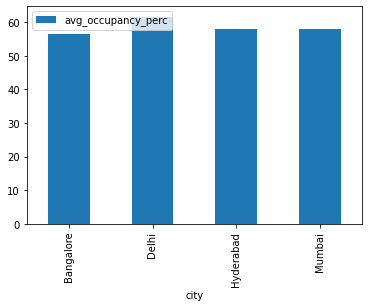

In [125]:
df2.plot(kind = "bar")
plt.show()

Delhi have highest average occupancy_perc , but the difference is small with repsect ot other cities.

**3. When was the occupancy better? Weekday or Weekend?**

In [126]:
df_date.head(2)

,date,mmm yy,week no,day_type
0,01-May-22,May 22,W 19,weekend
1,02-May-22,May 22,W 19,weekeday


In [127]:
df_final.head(2)

,property_id,check_in_date,room_category,successful_bookings,capacity,Occupancy_perc,room_class,property_name,category,city
0,16559,1-May-22,RT1,25,30.0,83.33,Standard,Atliq Exotica,Luxury,Mumbai
1,16559,2-May-22,RT1,20,30.0,66.67,Standard,Atliq Exotica,Luxury,Mumbai


In [128]:
df_date.dtypes

date        object
mmm yy      object
week no     object
day_type    object
dtype: object

In [129]:
df_final.dtypes

property_id              int64
check_in_date           object
room_category           object
successful_bookings      int64
capacity               float64
Occupancy_perc         float64
room_class              object
property_name           object
category                object
city                    object
dtype: object

In [130]:
#converting into datetime datatype
df_date["date"] = pd.to_datetime(df_date["date"])
df_final["check_in_date"] = pd.to_datetime(df_final["check_in_date"])

In [131]:
df_date.dtypes

date        datetime64[ns]
mmm yy              object
week no             object
day_type            object
dtype: object

In [132]:
df_final.dtypes

property_id                     int64
check_in_date          datetime64[ns]
room_category                  object
successful_bookings             int64
capacity                      float64
Occupancy_perc                float64
room_class                     object
property_name                  object
category                       object
city                           object
dtype: object

In [133]:
df_final = pd.merge(df_final,df_date,left_on="check_in_date",right_on="date")

In [134]:
df_final.head(3)

,property_id,check_in_date,room_category,successful_bookings,capacity,Occupancy_perc,room_class,property_name,category,city,date,mmm yy,week no,day_type
0,16559,2022-05-01,RT1,25,30.0,83.33,Standard,Atliq Exotica,Luxury,Mumbai,2022-05-01,May 22,W 19,weekend
1,16559,2022-05-01,RT2,35,41.0,85.37,Elite,Atliq Exotica,Luxury,Mumbai,2022-05-01,May 22,W 19,weekend
2,16559,2022-05-01,RT3,27,32.0,84.38,Premium,Atliq Exotica,Luxury,Mumbai,2022-05-01,May 22,W 19,weekend


In [135]:
df3 = round(df_final.groupby(by=["day_type"]).mean()[["Occupancy_perc"]],2)
df3.columns = ["Avg_occupancy_perc"]
df3

,Avg_occupancy_perc
day_type,
weekeday,51.82
weekend,74.24


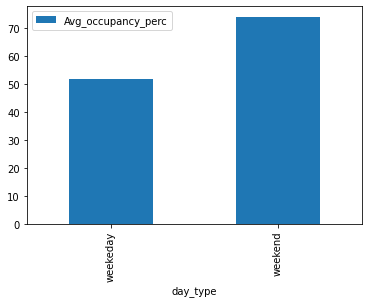

In [136]:
df3.plot(kind = "bar")
plt.show()

Weekend has high occupancy rate

**4: In the month of June, what is the occupancy for different cities**

In [137]:
df4 = round(df_final[df_final["mmm yy"]=="Jun 22"].groupby(by=["city"]).mean()[["Occupancy_perc"]],2)
df4.columns = ["Avg_occupany_perc"]
df4

,Avg_occupany_perc
city,
Bangalore,55.95
Delhi,61.46
Hyderabad,57.69
Mumbai,57.79


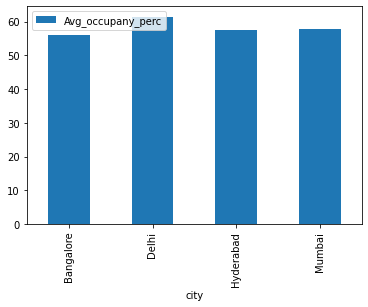

In [138]:
df4.plot(kind="bar")
plt.show()

Delhi have highest average occupancy_perc , but the difference is small with repsect ot other cities.

**5: We got new data for the month of august. Append that to existing data**

In [139]:
df_august = pd.read_csv(r"D:\yash\Code Basics\4.Python\source-code\3_project_hospitality_analysis\datasets\new_data_august.csv")

In [140]:
df_august.head(2)

,property_id,property_name,category,city,room_category,room_class,check_in_date,mmm yy,week no,day_type,successful_bookings,capacity,occ%
0,16559,Atliq Exotica,Luxury,Mumbai,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,30,30,100.0
1,19562,Atliq Bay,Luxury,Bangalore,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,21,30,70.0


In [141]:
df_august.shape

(7, 13)

In [142]:
df_final = pd.concat([df_final,df_august],ignore_index=True, axis = 0)

In [143]:
df_final.shape

(9207, 15)

In [144]:
df_final.tail(5)

,property_id,check_in_date,room_category,successful_bookings,capacity,Occupancy_perc,room_class,property_name,category,city,date,mmm yy,week no,day_type,occ%
9202,19563,01-Aug-22,RT1,23,30.0,NaN,Standard,Atliq Palace,Business,Bangalore,NaT,Aug-22,W 32,weekeday,76.67
9203,19558,01-Aug-22,RT1,30,40.0,NaN,Standard,Atliq Grands,Luxury,Bangalore,NaT,Aug-22,W 32,weekeday,75.00
9204,19560,01-Aug-22,RT1,20,26.0,NaN,Standard,Atliq City,Business,Bangalore,NaT,Aug-22,W 32,weekeday,76.92
9205,17561,01-Aug-22,RT1,18,26.0,NaN,Standard,Atliq Blu,Luxury,Mumbai,NaT,Aug-22,W 32,weekeday,69.23
9206,17564,01-Aug-22,RT1,10,16.0,NaN,Standard,Atliq Seasons,Business,Mumbai,NaT,Aug-22,W 32,weekeday,62.50


**6. Print revenue realized per city**

In [145]:
df_bookings.head()

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
1,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
4,May012216558RT15,16558,27-04-22,1/5/2022,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920
5,May012216558RT16,16558,1/5/2022,1/5/2022,3/5/2022,2.0,RT1,others,4.0,Checked Out,9100,9100
6,May012216558RT17,16558,28-04-22,1/5/2022,6/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
7,May012216558RT18,16558,26-04-22,1/5/2022,3/5/2022,2.0,RT1,logtrip,NaN,No Show,9100,9100


In [146]:
df_hotels.head()

,property_id,property_name,category,city
0,16558,Atliq Grands,Luxury,Delhi
1,16559,Atliq Exotica,Luxury,Mumbai
2,16560,Atliq City,Business,Delhi
3,16561,Atliq Blu,Luxury,Delhi
4,16562,Atliq Bay,Luxury,Delhi


In [147]:
df_final2 = pd.merge(df_bookings,df_hotels,on="property_id")

In [148]:
df_final2.head(2)

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,property_name,category,city
0,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi
1,May012216558RT15,16558,27-04-22,1/5/2022,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920,Atliq Grands,Luxury,Delhi


In [149]:
df6 = round(df_final2.groupby(by=["city"]).sum()[["revenue_realized"]],2)
df6["revenue_realized"] = df6["revenue_realized"].apply(lambda x : round(x/1000000,2))
df6.columns = ["revenue_realized(in mln)"]

In [150]:
df6

,revenue_realized(in mln)
city,
Bangalore,420.38
Delhi,294.40
Hyderabad,325.18
Mumbai,668.57


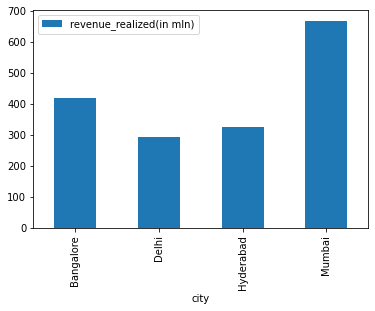

In [151]:
df6.plot(kind = "bar")
plt.show()

Revenue realized is highest from Mumbai

**7. Print month by month revenue**

In [152]:
df_final2.head(3)

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,property_name,category,city
0,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi
1,May012216558RT15,16558,27-04-22,1/5/2022,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920,Atliq Grands,Luxury,Delhi
2,May012216558RT16,16558,1/5/2022,1/5/2022,3/5/2022,2.0,RT1,others,4.0,Checked Out,9100,9100,Atliq Grands,Luxury,Delhi


In [153]:
df_final2["check_in_date"] = pd.to_datetime(df_final2["check_in_date"])

In [154]:
df_date.head(3)

,date,mmm yy,week no,day_type
0,2022-05-01,May 22,W 19,weekend
1,2022-05-02,May 22,W 19,weekeday
2,2022-05-03,May 22,W 19,weekeday


In [155]:
df_final2 = pd.merge(df_final2,df_date,left_on="check_in_date" ,right_on="date")

In [156]:
df_final2.head()

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,property_name,category,city,date,mmm yy,week no,day_type
0,May052216558RT11,16558,15-04-22,2022-05-05,7/5/2022,3.0,RT1,tripster,5.0,Checked Out,10010,10010,Atliq Grands,Luxury,Delhi,2022-05-05,May 22,W 19,weekeday
1,May052216558RT12,16558,30-04-22,2022-05-05,7/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi,2022-05-05,May 22,W 19,weekeday
2,May052216558RT13,16558,1/5/2022,2022-05-05,6/5/2022,3.0,RT1,direct offline,5.0,Checked Out,10010,10010,Atliq Grands,Luxury,Delhi,2022-05-05,May 22,W 19,weekeday
3,May052216558RT14,16558,3/5/2022,2022-05-05,6/5/2022,2.0,RT1,tripster,3.0,Checked Out,9100,9100,Atliq Grands,Luxury,Delhi,2022-05-05,May 22,W 19,weekeday
4,May052216558RT15,16558,30-04-22,2022-05-05,10/5/2022,4.0,RT1,others,4.0,Checked Out,10920,10920,Atliq Grands,Luxury,Delhi,2022-05-05,May 22,W 19,weekeday


In [224]:
df7 = df_final2.groupby(by=["mmm yy"]).sum()[["revenue_realized"]].sort_values(by=["mmm yy"],ascending=False)
df7["revenue_realized"] = df7["revenue_realized"].apply(lambda x:round(x/1000000,2))
df7.columns = ["revenue_realized(in mln)"]
df7

,revenue_realized(in mln)
mmm yy,
May 22,408.38
Jun 22,377.19
Jul 22,389.94


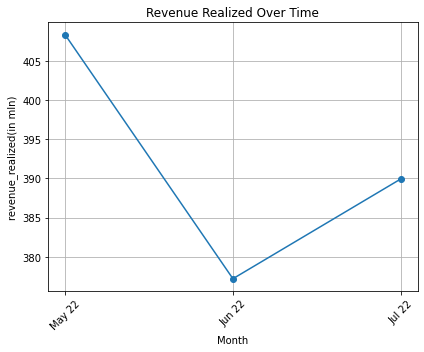

In [225]:
plt.figure(figsize=(6, 5)) 
plt.plot(df7.index, df7["revenue_realized(in mln)"], marker='o', linestyle='-')


plt.xlabel('Month')
plt.ylabel('revenue_realized(in mln)')
plt.title('Revenue Realized Over Time')

plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()  
plt.show()


**8.revenue realized per hotel type**

In [159]:
df_final2.head(2)

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,property_name,category,city,date,mmm yy,week no,day_type
0,May052216558RT11,16558,15-04-22,2022-05-05,7/5/2022,3.0,RT1,tripster,5.0,Checked Out,10010,10010,Atliq Grands,Luxury,Delhi,2022-05-05,May 22,W 19,weekeday
1,May052216558RT12,16558,30-04-22,2022-05-05,7/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi,2022-05-05,May 22,W 19,weekeday


In [160]:
df8 = df_final2.groupby(by=["category"]).sum()[["revenue_realized"]]
df8["revenue_realized"] = df8["revenue_realized"].apply(lambda x:round(x/1000000,2))
df8.columns = ["revenue_realized(in mln)"]
df8

,revenue_realized(in mln)
category,
Business,451.95
Luxury,723.56


In [186]:
values = [451.95,723.56]
labels = ["Business","Luxury"]

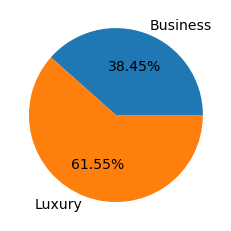

In [187]:
plt.pie(values, labels=labels, autopct="%.2f%%",textprops={'fontsize': 14})
plt.show()

**9.Print average rating per city**

In [162]:
df_final2.head(2)

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,property_name,category,city,date,mmm yy,week no,day_type
0,May052216558RT11,16558,15-04-22,2022-05-05,7/5/2022,3.0,RT1,tripster,5.0,Checked Out,10010,10010,Atliq Grands,Luxury,Delhi,2022-05-05,May 22,W 19,weekeday
1,May052216558RT12,16558,30-04-22,2022-05-05,7/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi,2022-05-05,May 22,W 19,weekeday


In [163]:
df9 = round(df_final2.groupby(by=["city"]).mean()[["ratings_given"]],2)
df9

,ratings_given
city,
Bangalore,3.40
Delhi,3.78
Hyderabad,3.66
Mumbai,3.64


Almost all cities have similar ratings for the hotels

In [164]:
df_final2["ratings_given"].value_counts()

5.0    13360
3.0    12085
4.0     6593
2.0     4451
1.0     2433
Name: ratings_given, dtype: int64

**10.revenue realized per booking platform**

In [165]:
df_final2.head(3)

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,property_name,category,city,date,mmm yy,week no,day_type
0,May052216558RT11,16558,15-04-22,2022-05-05,7/5/2022,3.0,RT1,tripster,5.0,Checked Out,10010,10010,Atliq Grands,Luxury,Delhi,2022-05-05,May 22,W 19,weekeday
1,May052216558RT12,16558,30-04-22,2022-05-05,7/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi,2022-05-05,May 22,W 19,weekeday
2,May052216558RT13,16558,1/5/2022,2022-05-05,6/5/2022,3.0,RT1,direct offline,5.0,Checked Out,10010,10010,Atliq Grands,Luxury,Delhi,2022-05-05,May 22,W 19,weekeday


In [227]:
df_final3 = df_final2[df_final2["booking_platform"]!="others"]

In [228]:
df10 = df_final3.groupby(by=["booking_platform"]).sum()[["revenue_realized"]]
df10["revenue_realized"] = df10["revenue_realized"].apply(lambda x:round(x/1000000,2))
df10.columns = ["revenue_realized(in mln)"]
df10

,revenue_realized(in mln)
booking_platform,
direct offline,59.30
direct online,117.25
journey,71.23
logtrip,129.04
makeyourtrip,233.13
tripster,84.87


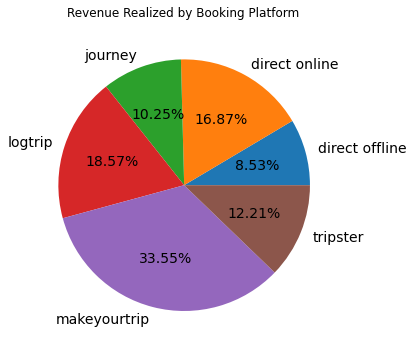

In [229]:

labels = df10.index
values = df10["revenue_realized(in mln)"]

plt.figure(figsize=(5,6))
plt.pie(values, labels=labels, autopct="%.2f%%",textprops={'fontsize': 14})
plt.title('Revenue Realized by Booking Platform')
plt.axis('equal')  
plt.show()


<h2 align="center">The End<h2>

In [188]:
df_rooms

,room_id,room_class
0,RT1,Standard
1,RT2,Elite
2,RT3,Premium
3,RT4,Presidential


In [208]:
df_hotels.head()

,property_id,property_name,category,city
0,16558,Atliq Grands,Luxury,Delhi
1,16559,Atliq Exotica,Luxury,Mumbai
2,16560,Atliq City,Business,Delhi
3,16561,Atliq Blu,Luxury,Delhi
4,16562,Atliq Bay,Luxury,Delhi


In [217]:
s1 =pd.merge(df_bookings,df_hotels,on="property_id")
s1[s1["property_name"]=="Atliq Grands"]["room_category"].unique()

array(['RT1', 'RT2', 'RT3', 'RT4'], dtype=object)